## Choix d'operateur
On considére un univers où le marché des forfaits de téléphonie mobile d’un pays se répartit entre trois entreprises A, B et C. Chaque mois, une certaine proportion des clients change d’opérateur et cette proportion est supposée invariante dans le temps. Ainsi modélise-t-on l’évolution du choix d’un client par une chaîne de Markov $(X_n)_{n \in \mathbb{N}}$ à valeurs dans l’ensemble $\{0, 1, 2\}$. On suppose que la matrice de transition de cette chaîne est donnée par : $$P = \begin{pmatrix} 0.8 & 0.05 & 0.15 \\ 0.1 & 0.7 & 0.2 \\ 0.1 & 0.1 & 0.8 \end{pmatrix}.$$



In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Définition de la matrice P
P = np.matrix([[0.8, 0.05, 0.15],[0.1, 0.7, 0.2],[0.1, 0.1, 0.8]])

print("Matrice P :")
print(P)


Matrice P :
[[0.8  0.05 0.15]
 [0.1  0.7  0.2 ]
 [0.1  0.1  0.8 ]]


Il est clair que tous les états communiquent, ainsi la chaîne est irréductible. De plus, l'unique classe
de communication est fermée, car unique, et finie ; elle est donc récurrente. Finalement, la probabilité de
rester en 0, $P_{0,0}$ est strictement positive, la chaîne est donc apériodique.

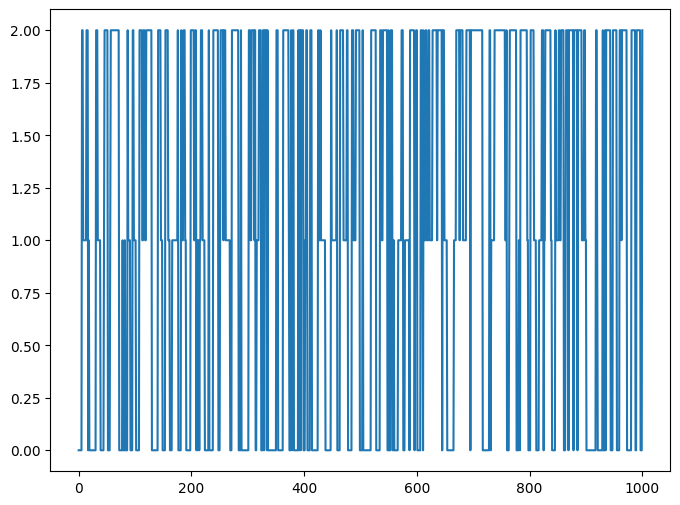

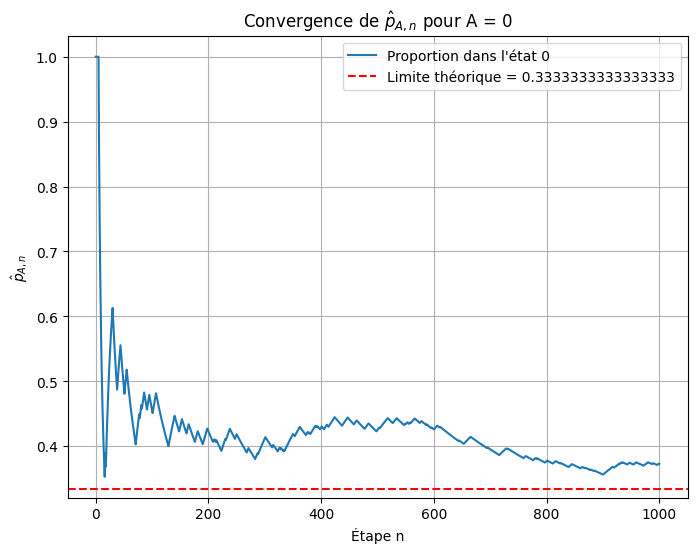

In [20]:
def simuler_chaine_markov(mu, P, n):
    N = len(mu)  # Nombre d'états
    etats = np.arange(N)  # États possibles {0, ..., N-1}
    trajectoire = []
    etat_actuelle = np.random.choice(etats, p=mu)  # État initial
    trajectoire.append(etat_actuelle)
    
    for _ in range(n):
        etat_actuelle = np.random.choice(etats, p=P[etat_actuelle])
        trajectoire.append(etat_actuelle)
    
    return np.array(trajectoire)



def calculer_proportion(trajectoire, A):
    n = len(trajectoire) - 1
    proportions = np.cumsum(trajectoire == A) / np.arange(1, n + 2)
    return proportions


mu_0 = np.array([0.9, 0.1, 0])  # Loi initiale
P = np.array([[0.8, 0.05, 0.15],  # Matrice de transition
              [0.1, 0.7, 0.2],
              [0.1, 0.1, 0.8]])
n = 1000  # Nombre d'étapes
A = 0  # État pour lequel on calcule la proportion

# Simulation
trajectoire = simuler_chaine_markov(mu_0, P, n)
#graphique de la trajectoire
plt.figure(figsize=(8, 6))
plt.plot(trajectoire)


# Calcul des proportions
proportions = calculer_proportion(trajectoire, A)

# Affichage de la convergence
plt.figure(figsize=(8, 6))
plt.plot(range(n+1), proportions, label=f"Proportion dans l'état {A}")
plt.axhline(y=1/3, color='r', linestyle='--', label=f"Limite théorique = {1/3}")
plt.title(f"Convergence de $\\hat{{p}}_{{A,n}}$ pour A = {A}")
plt.xlabel("Étape n")
plt.ylabel(f"$\\hat{{p}}_{{A,n}}$")
plt.legend()
plt.grid()
plt.show()

On note $\hat{p}_{A,n}$ la proportion de temps passée par la chaîne dans l’état 0 au cours des n premiers instants. On a donc $\hat{p}_{A,n} = \frac{1}{n} \sum_{k=0}^{n-1} \mathbb{1}_{X_k = 0}$. On aimerait estimer la valeur de $\hat{p}_{A,n}$ pour $n$ grand. Pour cela, on va simuler la chaîne de Markov $(X_n)_{n \in \mathbb{N}}$ et tracer la courbe de $\hat{p}_{A,n}$ en fonction de $n$.

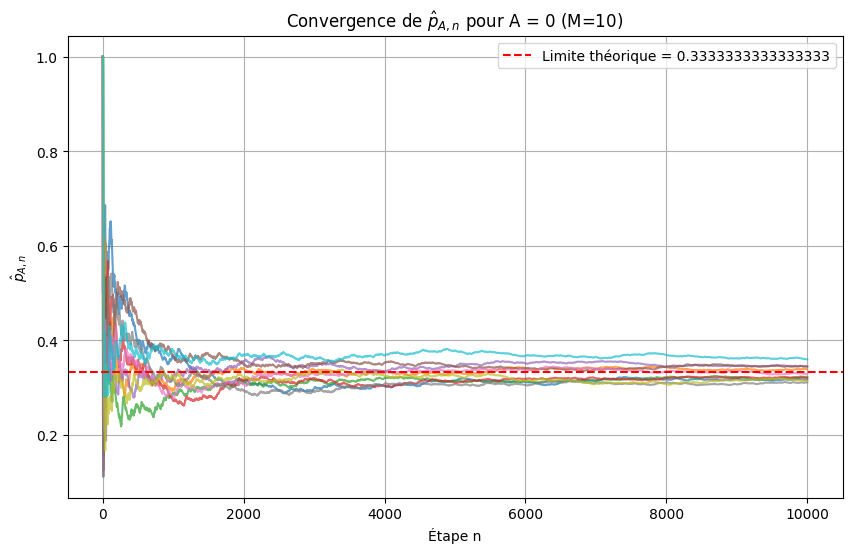

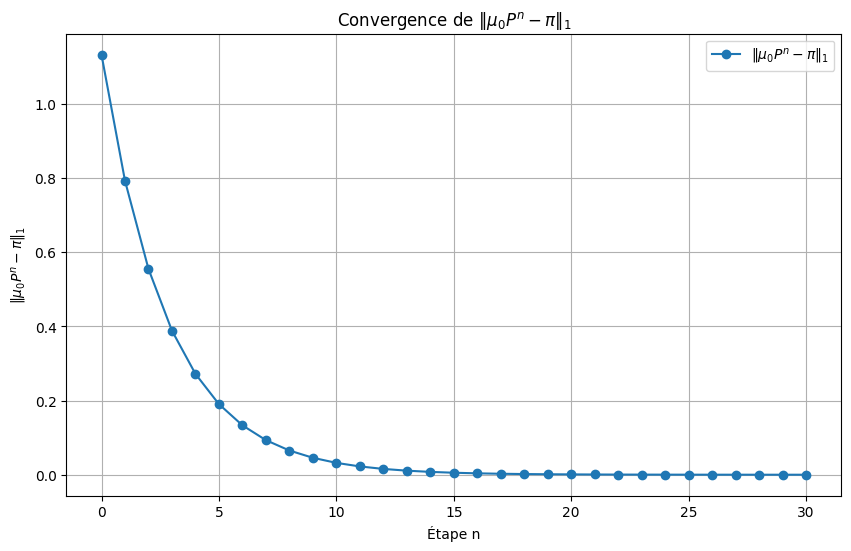

In [21]:
import warnings
warnings.filterwarnings("ignore")
n = 10000  # Nombre d'étapes
A = 0
M = 10 # Nombre de trajectoires

plt.figure(figsize=(10, 6))

for m in range(M):
    trajectoire = simuler_chaine_markov(mu_0, P, n)
    proportions = calculer_proportion(trajectoire, A)
    plt.plot(range(n+1), proportions, alpha=0.7)

plt.axhline(y=1/3, color='r', linestyle='--', label=f"Limite théorique = {1/3}")
plt.title(f"Convergence de $\\hat{{p}}_{{A,n}}$ pour A = {A} (M={M})")
plt.xlabel("Étape n")
plt.ylabel(f"$\\hat{{p}}_{{A,n}}$")
plt.legend()
plt.grid()
plt.show()
# %%
# Calcul de la distribution stationnaire
eigvals, eigvecs = np.linalg.eig(P.T)
stationary = eigvecs[:, np.isclose(eigvals, 1)]
stationary = stationary / stationary.sum()  # Normalisation
stationary = stationary.real  # Retirer les parties imaginaires
pi = stationary.flatten()  # Distribution stationnaire
n_max =30
# Calcul de ||mu_0 P^n - pi||_1
norm_diff = []
mu_n = mu_0
for n in range(n_max + 1):
    norm = np.sum(np.abs(mu_n - pi))  # Norme L^1
    norm_diff.append(norm)
    mu_n = mu_n @ P  # Mise à jour : mu_n = mu_n * P

# Affichage de la convergence
plt.figure(figsize=(10, 6))
plt.plot(range(n_max + 1), norm_diff, marker='o', label=r"$\|\mu_0 P^n - \pi\|_1$")
plt.title("Convergence de $\|\mu_0 P^n - \pi\|_1$")
plt.xlabel("Étape n")
plt.ylabel(r"$\|\mu_0 P^n - \pi\|_1$")
plt.grid()
plt.legend()
plt.show()




## Marche aléatoire sur $\mathbb{Z}$


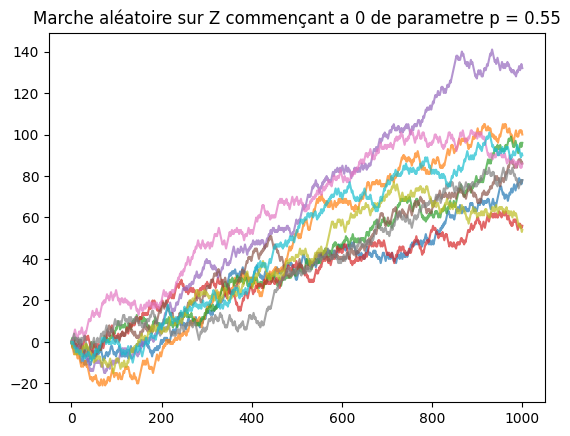

In [22]:
def ma(x,p,N):
    Sn = x
    trajectoire = [Sn]
    for i in range(N):
        Sn = Sn + np.random.choice([1,-1],p=[p,1-p])
        trajectoire.append(Sn)
    return trajectoire

N = 1000
x = 0
p = 0.55
np.random.seed(12345)
for i in range(10):
    trajectoire = ma(x,p,N)
    plt.plot(trajectoire,alpha=0.7)
    plt.title("Marche aléatoire sur Z commençant a 0 de parametre p = 0.55")


Marche aléatoire arrété au temps ou elle atteint a ou b

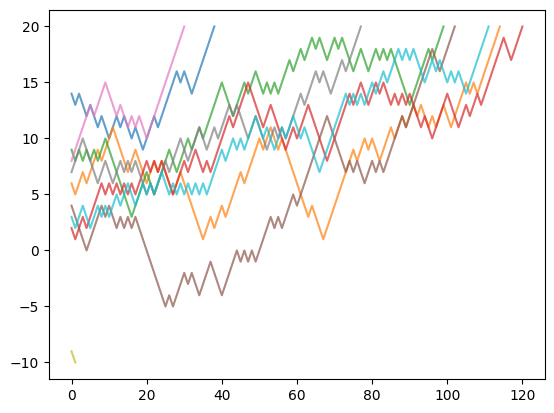

In [23]:

# marche aléatoire arrété au temps ou elle atteint a ou b
def maT(a,b,p,N):
    if a >= b:
        raise ValueError("on doit avoir a < b")
    x = np.random.randint(a, b+1)
    Sn = x
    trajectoire = [Sn]
    for i in range(N):
        while Sn != a and Sn != b:
            Sn = Sn + np.random.choice([1,-1],p=[p,1-p])
            trajectoire.append(Sn)
    return trajectoire

a=-10
b=20
N = 100
p = 0.55
for i in range(10):
    trajectoire = maT(a,b,p,N)
    plt.plot(trajectoire,alpha=0.7)

def maT(a, b, x, p):
    Sn = x
    trajectoire = [Sn]
    
    while Sn != a and Sn != b:
        Sn = Sn + np.random.choice([1, -1], p=[p, 1-p])
        trajectoire.append(Sn)
    
    return trajectoire


estimation de la probabilité que la marche issue de $x$ touche $a$ avant $b$ en simulant $m$ réalisations de $S_n$.

In [24]:

def sortie(a, b, x, p, m):
    acc = 0 
    for i in range(m):
        trajectoire = maT(a, b, x, p)
        if trajectoire[-1] == a:
            acc += 1
    
    return acc / m

a = -10
b = 10
x = 0
p = 0.55
m = 1000
sortie(a, b, x, p, m)


0.115

Estimation de $\mathbb{E}_x[T_{ab}]$ qui est la somme des probabilités que la marche touche $a$ avant $b$ en partant de $x$.


Espérance estimée du temps d'atteinte T_ab (m=1000) : 73.80


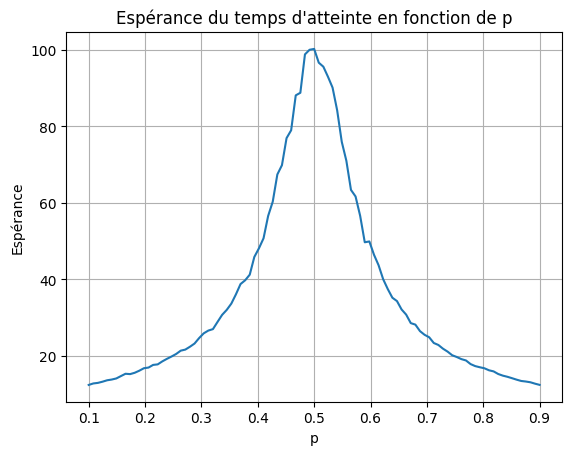

In [25]:

def EspT(a, b, x, p, m):
    total_time = 0
    for i in range(m):
        trajectoire = maT(a, b, x, p)
        total_time += len(trajectoire) - 1
    
    return total_time / m

# Exemple : Paramètres
a = -10  # Borne inférieure
b = 10   # Borne supérieure
x = 0    # Position initiale
p = 0.55 # Probabilité de monter
m = 1000 # Nombre de simulations

# Estimation de l'espérance
esperance = EspT(a, b, x, p, m)
print(f"Espérance estimée du temps d'atteinte T_ab (m={m}) : {esperance:.2f}")

#%%
#evolution pour differente valeur de p
p = np.linspace(0.1, 0.9, 99)
m = 1000
esp = []
for i in range(len(p)):
    esp.append(EspT(a, b, x, p[i], m))

plt.plot(p, esp)
plt.xlabel("p")
plt.ylabel("Espérance")
plt.title("Espérance du temps d'atteinte en fonction de p")
plt.grid()

## File d'attente

On étudie l’évolution d’une file d’attente à un guichet. On suppose qu’un client est servi par unité de temps. On note $N_n$ le nombre de clients arrivant dans la n-ième unité de temps. On suppose que les variables $N_n$ s’écrivent $G_{n-1}$ où les $(G_n)_{n \in \mathbb{N}}$ sont des v.a.i.i.d. de loi géométrique $G(p)$ pour un certain $p \in ]0;1]$ et qu’un client arrivant à la période n ne peut pas être servi avant la période n + 1. Finalement, on note $X_n$ le nombre de clients dans la file d’attente à l’instant n et on prend que $X_0 = x \in \mathbb{N}$. On a ainsi

$$
\forall n \in \mathbb{N}, \quad X_{n+1} = N_{n+1} + X_n - 1_{X_n \geq 1}.
$$


<Figure size 1200x600 with 0 Axes>

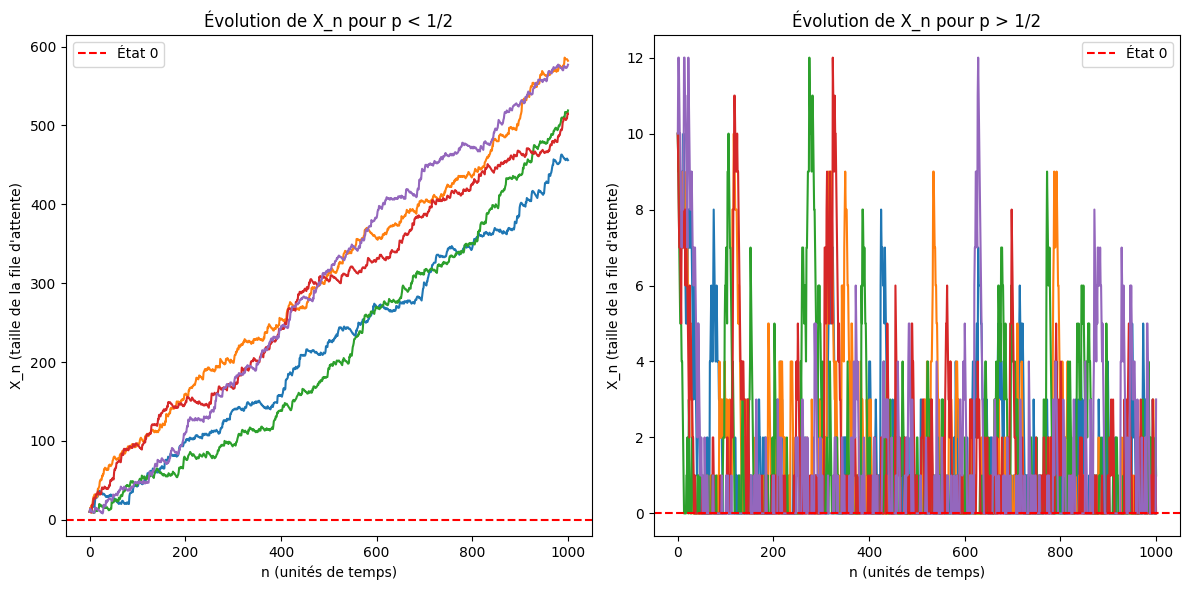

In [26]:
def File(n, p, x):
    X = [x]
    for t in range(n):
        N_n = np.random.geometric(p) - 1
        X_t = X[-1]
        X_next = max(0, N_n + X_t - 1)
        X.append(X_next)
    return X

n = 1000
x = 100

p_low = 0.4
trajectoire_p_low = File(n, p_low, x)

p_high = 0.6
trajectoire_p_high = File(n, p_high, x)

plt.figure(figsize=(12, 6))

n = 1000
x = 10
realisations = 5

p_low = 0.4
trajectoires_p_low = [File(n, p_low, x) for _ in range(realisations)]

p_high = 0.6
trajectoires_p_high = [File(n, p_high, x) for _ in range(realisations)]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for i, trajectoire in enumerate(trajectoires_p_low):
    plt.plot(trajectoire)
plt.axhline(0, color="red", linestyle="--", label="État 0")
plt.title("Évolution de X_n pour p < 1/2")
plt.xlabel("n (unités de temps)")
plt.ylabel("X_n (taille de la file d'attente)")
plt.legend()

plt.subplot(1, 2, 2)
for i, trajectoire in enumerate(trajectoires_p_high):
    plt.plot(trajectoire)
plt.axhline(0, color="red", linestyle="--", label="État 0")
plt.title("Évolution de X_n pour p > 1/2")
plt.xlabel("n (unités de temps)")
plt.ylabel("X_n (taille de la file d'attente)")
plt.legend()

plt.tight_layout()
plt.show()

## Marche aléatoire sur $\mathbb{Z}^2$

On considère la marche aléatoire simple sur $ \mathbb{Z}^2 $ issue de $(0; 0) \in \mathbb{Z}^2$, c’est-à-dire le processus $(S_n)_{n \in \mathbb{N}}$ défini par

$$
\begin{cases} 
S_0 = (0; 0) \\ 
S_{n+1} = S_n + X_{n+1}
\end{cases}
$$

où $(X_n)_{n \in \mathbb{N}}$ est une suite de v.a.i.i.d. telle que

$$
\mathbb{P}(X_1 = (1; 0)) = p_1, \quad \mathbb{P}(X_1 = (-1; 0)) = p_2, \quad \mathbb{P}(X_1 = (0; 1)) = p_3, \quad \text{et} \quad \mathbb{P}(X_1 = (0; -1)) = p_4.
$$

où $\sum_{i=1}^4 p_i = 1$.


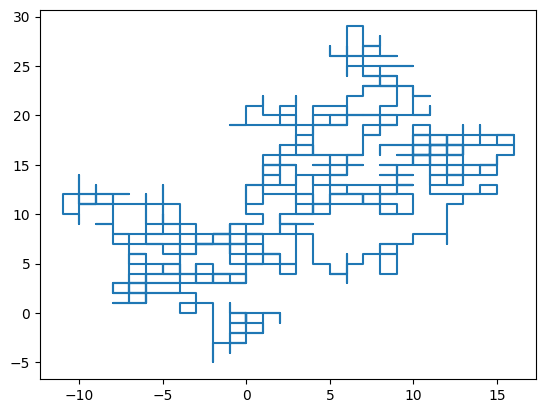

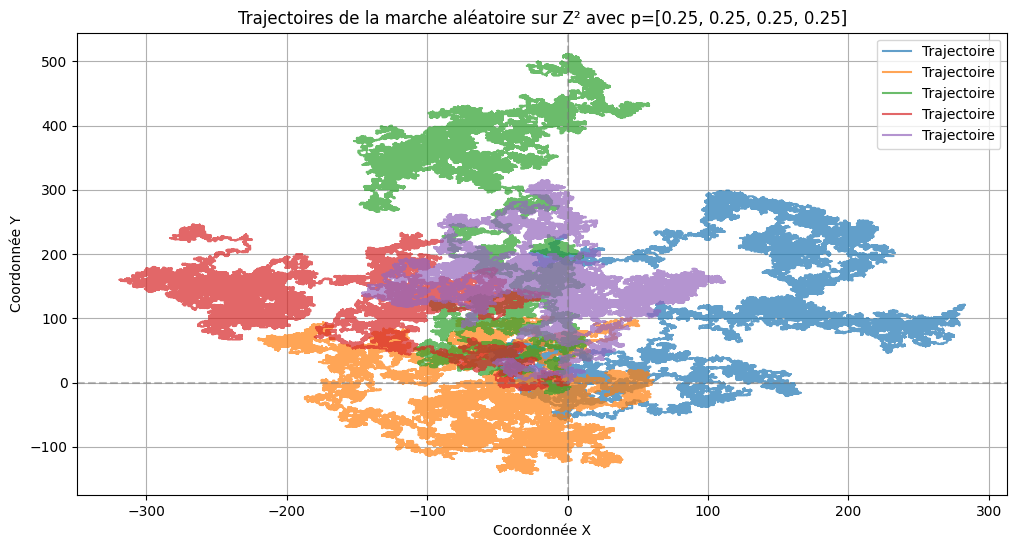

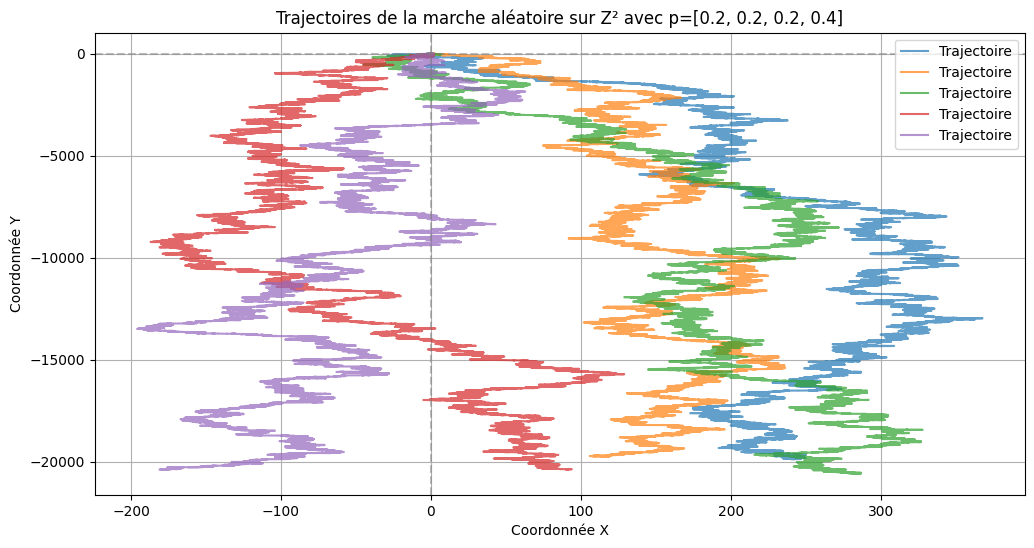

In [27]:
def maZ2(p, N):
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    trajectoire = [(0, 0)]
    for _ in range(N):
        X_n = directions[np.random.choice(4, p=p)]
        S_n = tuple(np.add(trajectoire[-1], X_n))
        trajectoire.append(S_n)
    return trajectoire

# Exemple
p = [0.25, 0.25, 0.25, 0.25]  # Probabilités associées aux directions
N = 1000  # Nombre de pas
trajectoire = maZ2(p, N)
plt.plot([x[0] for x in trajectoire], [x[1] for x in trajectoire])


import matplotlib.pyplot as plt

def plot_maZ2(p, N, realizations):
    plt.figure(figsize=(12, 6))
    for _ in range(realizations):
        trajectoire = maZ2(p, N)
        x_coords = [pos[0] for pos in trajectoire]
        y_coords = [pos[1] for pos in trajectoire]
        plt.plot(x_coords, y_coords, alpha=0.7, label="Trajectoire")
    plt.axhline(0, color="gray", linestyle="--", alpha=0.5)
    plt.axvline(0, color="gray", linestyle="--", alpha=0.5)
    plt.title(f"Trajectoires de la marche aléatoire sur Z² avec p={p}")
    plt.xlabel("Coordonnée X")
    plt.ylabel("Coordonnée Y")
    plt.legend()
    plt.grid(True)
    plt.show()

# Exemple avec p identiques et non identiques
N = 100000  # Nombre de pas
realizations = 5  # Nombre de trajectoires

# Cas 1 : p_i = 1/4 pour tout i
p_uniform = [0.25, 0.25, 0.25, 0.25]
plot_maZ2(p_uniform, N, realizations)

# Cas 2 : p_i non identiques
p_non_uniform = [0.2, 0.2, 0.2, 0.4]
plot_maZ2(p_non_uniform, N, realizations)